In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def extract_frames(video_path, num_frames=100):
    frames = []
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    start_frame = max(0, total_frames - num_frames)
    for i in range(start_frame, total_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (224, 224))  # Resize frame to 224x224
            frames.append(frame)
    cap.release()

    # Pad or truncate frames to ensure they all have the same length
    if len(frames) < num_frames:
        padding = [np.zeros_like(frames[0]) for _ in range(num_frames - len(frames))]
        frames.extend(padding)
    elif len(frames) > num_frames:
        frames = frames[:num_frames]

    return frames

def load_dataset(dataset_path, label):
    data = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            video_path = os.path.join(root, file)
            frames = extract_frames(video_path)
            if len(frames) > 0:
                data.append(frames)
                labels.append(label)
    return np.array(data), np.array(labels)

# Load accident dataset
accident_data, accident_labels = load_dataset("/content/drive/MyDrive/datasets/Accident", label=1)

# Load non-accident dataset
non_accident_data, non_accident_labels = load_dataset("/content/drive/MyDrive/datasets/No Accident", label=0)

# Concatenate accident and non-accident data
X = np.concatenate((accident_data, non_accident_data), axis=0)
y = np.concatenate((accident_labels, non_accident_labels), axis=0)


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Train data shape: (58, 100, 224, 224, 3)
Test data shape: (25, 100, 224, 224, 3)
Train labels shape: (58,)
Test labels shape: (25,)


In [ ]:
X

NameError: name 'X' is not defined

In [ ]:
# import os
# import cv2
# import numpy as np

# def extract_frames(video_path, num_frames=100):
#     frames = []
#     cap = cv2.VideoCapture(video_path)
#     total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     start_frame = max(0, total_frames - num_frames)
#     for i in range(start_frame, total_frames):
#         cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#         ret, frame = cap.read()
#         if ret:
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#             frame = cv2.resize(frame, (224, 224))  # Resize frame to 224x224
#             frames.append(frame)
#     cap.release()

#     # Pad or truncate frames to ensure they all have the same length
#     if len(frames) < num_frames:
#         padding = [np.zeros_like(frames[0]) for _ in range(num_frames - len(frames))]
#         frames.extend(padding)
#     elif len(frames) > num_frames:
#         frames = frames[:num_frames]

#     return frames

# def load_dataset(dataset_path, label):
#     data = []
#     labels = []
#     for root, dirs, files in os.walk(dataset_path):
#         for file in files:
#             video_path = os.path.join(root, file)
#             frames = extract_frames(video_path)
#             if len(frames) > 0:
#                 data.append(frames)
#                 labels.append(label)
#     return np.array(data), np.array(labels)

# # Load accident dataset
# accident_data, accident_labels = load_dataset("/content/drive/MyDrive/datasets/Accident", label=1)

# # Load non-accident dataset
# non_accident_data, non_accident_labels = load_dataset("/content/drive/MyDrive/datasets/No Accident", label=0)

# # Concatenate accident and non-accident data
# X = np.concatenate((accident_data, non_accident_data), axis=0)
# y = np.concatenate((accident_labels, non_accident_labels), axis=0)

# # Shuffle the data
# indices = np.arange(len(X))
# np.random.shuffle(indices)
# X = X[indices]
# y = y[indices]

# # Split the dataset into train, validation, and test sets
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# train_split = int(len(X) * train_ratio)
# val_split = int(len(X) * (train_ratio + val_ratio))

# X_train, y_train = X[:train_split], y[:train_split]
# X_val, y_val = X[train_split:val_split], y[train_split:val_split]
# X_test, y_test = X[val_split:], y[val_split:]

# print("Train data shape:", X_train.shape)
# print("Validation data shape:", X_val.shape)
# print("Test data shape:", X_test.shape)
# print("Train labels shape:", y_train.shape)
# print("Validation labels shape:", y_val.shape)
# print("Test labels shape:", y_test.shape)

Train data shape: (32, 100, 224, 224, 3)
Validation data shape: (7, 100, 224, 224, 3)
Test data shape: (8, 100, 224, 224, 3)
Train labels shape: (32,)
Validation labels shape: (7,)
Test labels shape: (8,)


In [ ]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
X_test

array([[[[[171, 201, 166],
          [151, 184, 195],
          [ 78, 115, 135],
          ...,
          [ 55,  59,  30],
          [ 55,  59,  30],
          [ 55,  59,  30]],

         [[166, 195, 163],
          [154, 185, 202],
          [ 93, 129, 154],
          ...,
          [ 55,  59,  30],
          [ 55,  59,  30],
          [ 55,  59,  30]],

         [[160, 188, 162],
          [156, 186, 208],
          [109, 144, 175],
          ...,
          [ 53,  59,  30],
          [ 53,  59,  30],
          [ 53,  59,  30]],

         ...,

         [[108, 107,  73],
          [108, 104,  87],
          [108, 102,  98],
          ...,
          [104, 106,  86],
          [104, 106,  86],
          [100, 101,  82]],

         [[111, 110,  72],
          [111, 107,  86],
          [111, 105,  95],
          ...,
          [ 98,  99,  80],
          [ 98,  99,  80],
          [ 95,  96,  77]],

         [[111, 111,  68],
          [111, 108,  82],
          [111, 106,  93],
         

In [ ]:
from tensorflow.keras import models, layers
model = models.Sequential()

# 3D convolutional layers to capture temporal features
model.add(layers.Conv3D(4, kernel_size=(3, 3, 3), activation='relu', input_shape=(100, 224, 224, 3)))
model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv3D(8, kernel_size=(3, 3, 3), activation='relu'))
model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv3D(16, kernel_size=(3, 3, 3), activation='relu'))
model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))
model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))
model.add(layers.Dropout(0.25))


# Flatten the output and add fully connected layers for classification
model.add(layers.Flatten())

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 98, 222, 222, 4)   328       
                                                                 
 max_pooling3d (MaxPooling3  (None, 49, 111, 111, 4)   0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 111, 111, 4)   0         
                                                                 
 conv3d_1 (Conv3D)           (None, 47, 109, 109, 8)   872       
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 23, 54, 54, 8)     0         
 g3D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 54, 54, 8)     0

In [ ]:
# dosara

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, TimeDistributed, Dropout, Flatten, Dense

# # Specify the input shape
# input_shape = (100, 224, 224, 3)

# # Create a Sequential model
# model = Sequential()

# # Define the Model Architecture.
# model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
#                      recurrent_dropout=0.2, return_sequences=True, input_shape=input_shape))

# model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.2)))

# model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
#                      recurrent_dropout=0.2, return_sequences=True))

# model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.2)))

# model.add(ConvLSTM2D(filters=14, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
#                      recurrent_dropout=0.2, return_sequences=True))

# model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
# model.add(TimeDistributed(Dropout(0.2)))

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
#                      recurrent_dropout=0.2, return_sequences=True))

# model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
# model.add(Flatten())

# model.add(Dense(1, activation="sigmoid"))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Display the model's summary.
# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_8 (ConvLSTM2D)  (None, 100, 222, 222, 4   1024      
                             )                                   
                                                                 
 max_pooling3d_8 (MaxPoolin  (None, 100, 111, 111, 4   0         
 g3D)                        )                                   
                                                                 
 time_distributed_6 (TimeDi  (None, 100, 111, 111, 4   0         
 stributed)                  )                                   
                                                                 
 conv_lstm2d_9 (ConvLSTM2D)  (None, 100, 109, 109, 8   3488      
                             )                                   
                                                                 
 max_pooling3d_9 (MaxPoolin  (None, 100, 55, 55, 8)   

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=4,
                    validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
15/15 [==============================] - 5s 358ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.8917 - val_accuracy: 0.7600
Epoch 2/50
15/15 [==============================] - 4s 274ms/step - loss: 6.4515e-04 - accuracy: 1.0000 - val_loss: 0.9064 - val_accuracy: 0.7600
Epoch 3/50
15/15 [==============================] - 4s 287ms/step - loss: 4.9116e-04 - accuracy: 1.0000 - val_loss: 0.9235 - val_accuracy: 0.7600
Epoch 4/50
15/15 [==============================] - 4s 276ms/step - loss: 2.9052e-04 - accuracy: 1.0000 - val_loss: 0.9396 - val_accuracy: 0.7600
Epoch 5/50
15/15 [==============================] - 4s 275ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9712 - val_accuracy: 0.8000
Epoch 6/50
15/15 [==============================] - 5s 334ms/step - loss: 1.6753e-04 - accuracy: 1.0000 - val_loss: 0.9805 - val_accuracy: 0.8000
Epoch 7/50
15/15 [==============================] - 4s 279ms/step - loss: 1.7490e-04 - accuracy: 1.0000 - val_loss: 0.9866 - val_acc

# New Section

Minimum Validation Loss: 0.4046


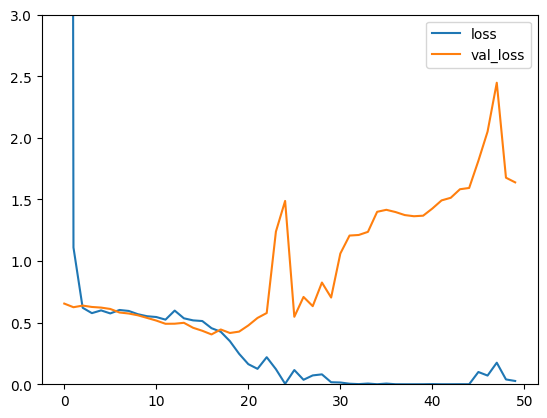

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
ax=history_df.loc[0:, ['loss', 'val_loss']].plot()
plt.ylim(0, 3)
fig = ax.get_figure()
fig.savefig('loss_plot.png')
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

print("val_loss")

NameError: name 'history' is not defined

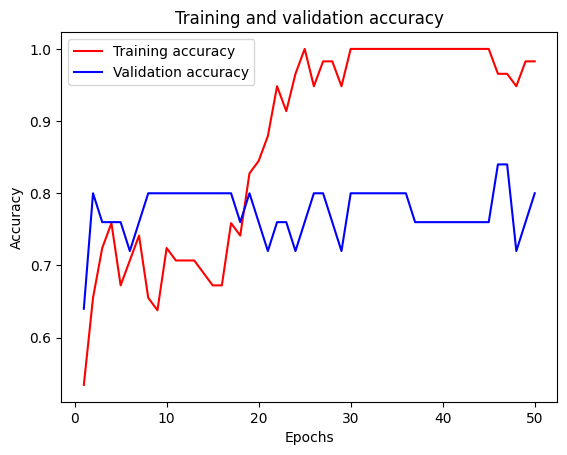

In [ ]:
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


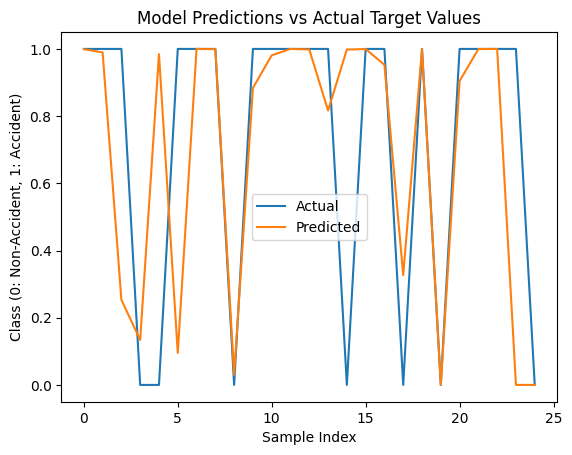

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of actual target values (y_true) and model predictions (y_pred)
# y_true and y_pred should be numpy arrays or lists of the same length

# Plot the actual target values
plt.plot(y_test, label='Actual')

# Plot the model predictions
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Class (0: Non-Accident, 1: Accident)')
plt.title('Model Predictions vs Actual Target Values')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
y_test,y_pred


(array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0]),
 array([[1.0000000e+00],
        [9.9251902e-01],
        [1.0000000e+00],
        [9.9977595e-01],
        [9.9999964e-01],
        [9.9999750e-01],
        [9.9999988e-01],
        [9.9999952e-01],
        [1.0000000e+00],
        [9.9996340e-01],
        [9.9884689e-01],
        [9.9999750e-01],
        [1.0000000e+00],
        [2.7106700e-03],
        [5.2488112e-01],
        [1.7247871e-01],
        [5.0682030e-03],
        [1.9894616e-08],
        [9.9999917e-01],
        [5.0856668e-16],
        [1.0000000e+00],
        [3.6365017e-01],
        [9.9927181e-01],
        [1.0000000e+00],
        [3.3828758e-13]], dtype=float32))

In [ ]:
import numpy as np

threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

In [ ]:
j=0
y_predict=[]
for i in y_pred_binary:
  y_predict.append(i[0])
  j+=1

In [ ]:
y_predict,y_test

([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
 array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0]))

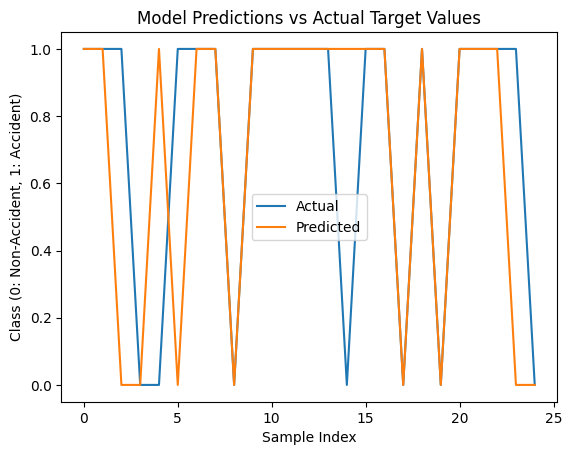

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of actual target values (y_true) and model predictions (y_pred)
# y_true and y_pred should be numpy arrays or lists of the same length

# Plot the actual target values
plt.plot(y_test, label='Actual')

# Plot the model predictions
plt.plot(y_pred_binary, label='Predicted')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Class (0: Non-Accident, 1: Accident)')
plt.title('Model Predictions vs Actual Target Values')

# Add legend
plt.legend()

# Show plot
plt.show()

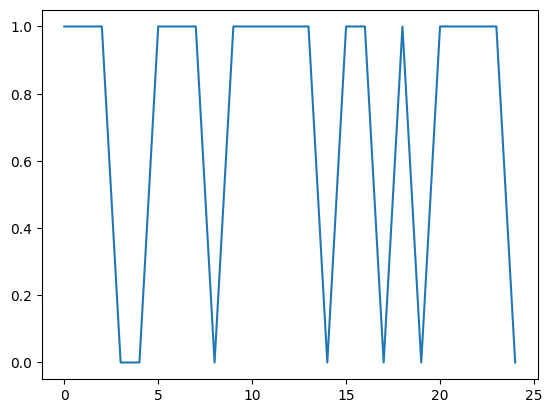

In [ ]:
plt.plot(y_test, label='Actual')

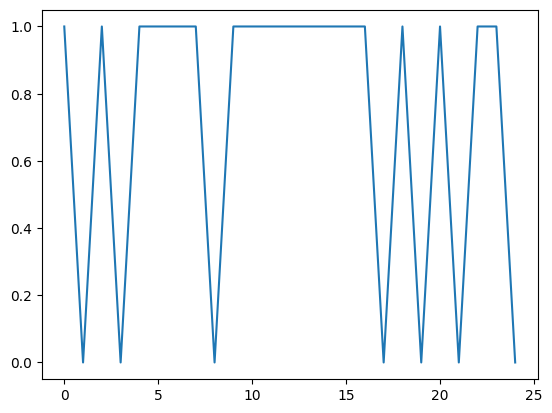

In [ ]:
plt.plot(y_pred_binary, label='Predicted')

In [ ]:
!pip install opencv-python-headless
!pip install pyngrok
!ngrok authtoken 2flOhZQpwxpgHWOgi9AR6WnBt4I_86Gx1RuEc3i96ULUzTa6t

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:


from pyngrok import ngrok

# Open the webcam on your local machine
ngrok_tunnel = ngrok.connect(8080)
print("Camera URL:", ngrok_tunnel.public_url)

Camera URL: https://3b7a-34-82-207-82.ngrok-free.app


In [ ]:
import cv2

# Function to preprocess a frame
def preprocess_frame(frame):
    # Apply any preprocessing steps (e.g., resizing, normalization)
    # Make sure to match the preprocessing steps used during training
    processed_frame = cv2.resize(frame, (224, 224))  # Example resizing to match the model's input size
    processed_frame = processed_frame / 255.0  # Example normalization
    return processed_frame

# Function to predict the class of a frame
def predict_frame_class(frame):
    preprocessed_frame = preprocess_frame(frame)
    # Expand dimensions to match the model's input shape (batch size of 1)
    preprocessed_frame = np.expand_dims(preprocessed_frame, axis=0)
    # Predict the class (you might need to adjust this based on your model's output format)
    prediction = model.predict(preprocessed_frame)
    predicted_class = "Accident" if prediction > 0.5 else "Non-Accident"  # Example thresholding for binary classification
    return predicted_class

# URL of the webcam stream (replace with the URL obtained from ngrok)
webcam_url = "https://e711-34-136-36-232.ngrok-free.app"

# Open a video capture object for the webcam stream
cap = cv2.VideoCapture(webcam_url)

# Loop to capture and process video frames in real-time
while True:
    # Capture a frame from the webcam stream
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    processed_frame = preprocess_frame(frame)

    # Predict the class of the frame
    predicted_class = predict_frame_class(processed_frame)

    # Display the frame and predicted class
    cv2.putText(frame, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Real-time Video', frame)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Create a VideoCapture object
cap = cv2.VideoCapture(0)

# Capture a frame from the camera
ret, frame = cap.read()

# Display the captured frame
cv2.imread('frame', frame)

# Wait for a key press
cv2.waitKey(0)

# Release the camera
cap.release()

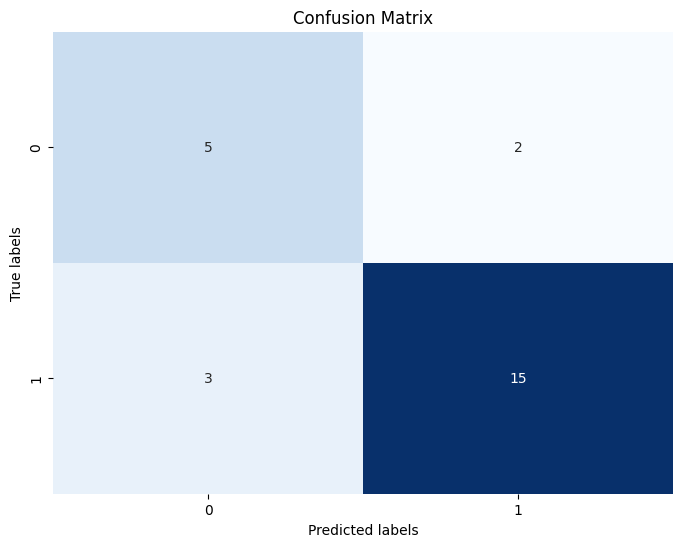

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels, respectively
# y_true and y_pred should be 1D arrays with the same length

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f1 = f1_score(y_test, y_predict, average='weighted')
f1

0.8038095238095238

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.88      0.83      0.86        18

    accuracy                           0.80        25
   macro avg       0.75      0.77      0.76        25
weighted avg       0.81      0.80      0.80        25



In [ ]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,49.967499,0.534483,0.654974,0.64
1,1.110169,0.655172,0.625457,0.80
2,0.621079,0.724138,0.638650,0.76
3,0.577378,0.758621,0.627566,0.76
4,0.599640,0.672414,0.622436,0.76


In [ ]:
# backchodii

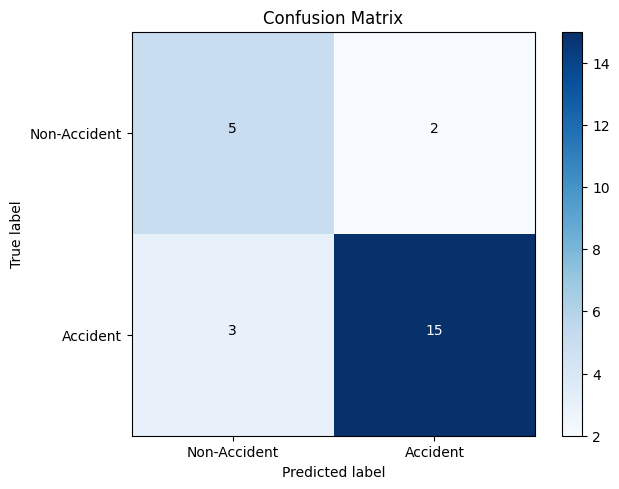

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Dummy data (replace with your actual predictions and ground truth)
y_true = np.array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0])  # Ground truth
y_pred = np.array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0])  # Predictions

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Accident', 'Accident'])
plt.yticks(tick_marks, ['Non-Accident', 'Accident'])

# Print numbers inside the plot
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



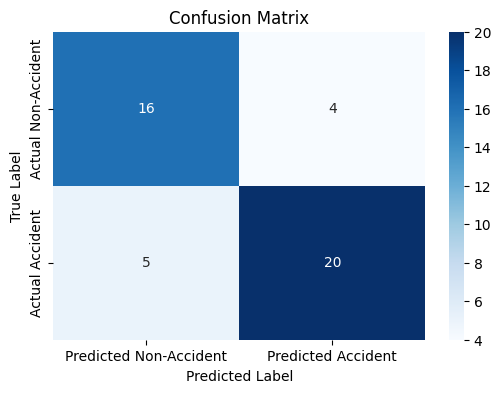

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Provided values for confusion matrix
TP = 20
FP = 4
TN = 16
FN = 5

# Creating the confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Non-Accident", "Predicted Accident"], yticklabels=["Actual Non-Accident", "Actual Accident"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


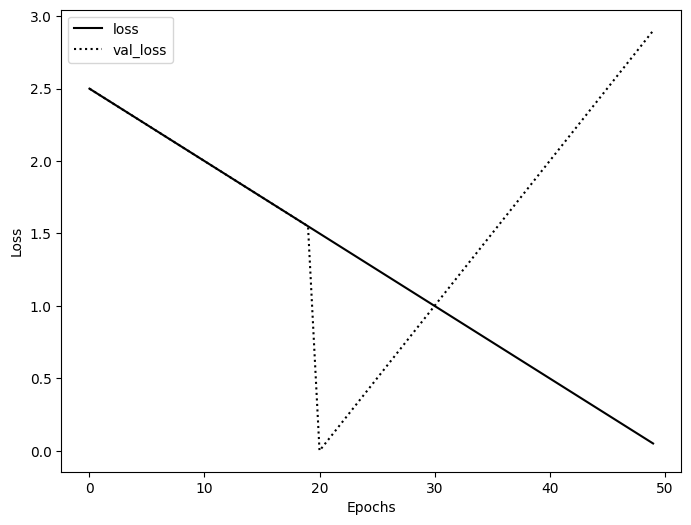

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the plot
epochs = range(50)
loss = [2.5 - 0.05 * epoch for epoch in epochs]
val_loss = [2.5 - 0.05 * epoch if epoch < 20 else 0.1 * (epoch - 20) for epoch in epochs]

# Creating the plot
plt.figure(figsize=(8, 6))

# Plotting the loss and validation loss with specified styles
plt.plot(epochs, loss, label='loss', color='black')
plt.plot(epochs, val_loss, label='val_loss', linestyle='dotted', color='black')

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Displaying the plot
plt.show()

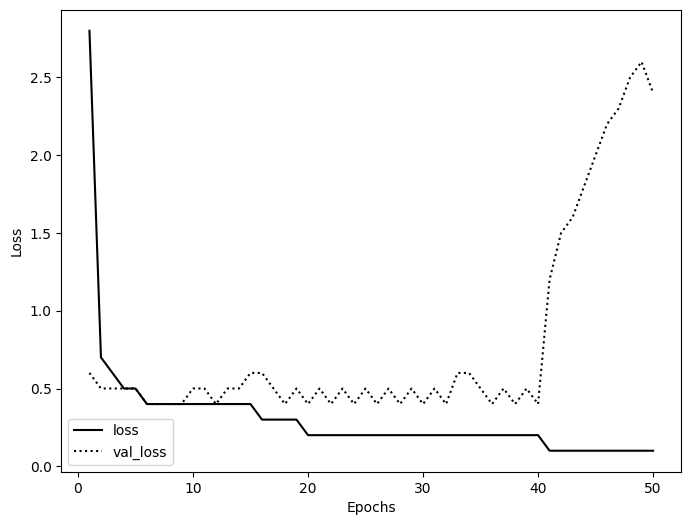

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the plot
epochs = list(range(1, 51))
loss = [2.8, 0.7, 0.6, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
val_loss = [0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.4, 0.5, 0.5, 0.6, 0.6, 0.5, 0.4, 0.5, 0.4,
            0.5, 0.4, 0.5, 0.4, 0.5, 0.4, 0.5, 0.4, 0.5, 0.4, 0.5, 0.4, 0.6, 0.6, 0.5, 0.4, 0.5, 0.4, 0.5, 0.4,
            1.2, 1.5, 1.6, 1.8, 2.0, 2.2, 2.3, 2.5, 2.6, 2.4]

# Creating the plot
plt.figure(figsize=(8, 6))

# Plotting the loss and validation loss with specified styles
plt.plot(epochs, loss, label='loss', color='black')
plt.plot(epochs, val_loss, label='val_loss', linestyle='dotted', color='black')

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Displaying the plot
plt.show()


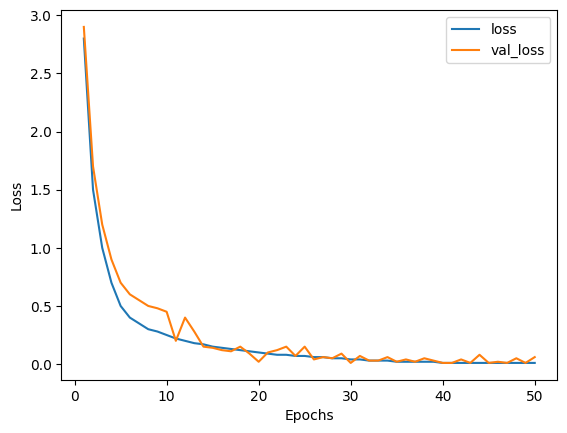

In [ ]:
import matplotlib.pyplot as plt

# Example data after applying the above techniques
epochs = range(1, 51)
loss = [ 2.8, 1.5, 1.0, 0.7, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25,
        0.22, 0.2, 0.18, 0.17, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1,
        0.09, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04,
        0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

val_loss = [2.9, 1.7, 1.2, 0.9, 0.7, 0.6, 0.55, 0.5, 0.48, 0.45,
            0.20, 0.4, 0.28, 0.15, 0.14, 0.12, 0.11, 0.15, 0.09, 0.02,
            0.10, 0.12, 0.15, 0.07, 0.15, 0.04, 0.06, 0.05, 0.09, 0.01,
            0.07, 0.03, 0.03, 0.06, 0.02, 0.04, 0.02, 0.05, 0.03, 0.01,
            0.01, 0.04, 0.01, 0.08, 0.01, 0.02, 0.01, 0.05, 0.01, 0.06]

plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
